In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Car%20Price.csv')
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [ ]:
df[['Fuel']].value_counts()

Fuel    
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
dtype: int64

In [ ]:
df.replace({'Fuel': {'Diesel': 0,
                     'Petrol': 1,
                     'CNG': 2,
                     'LPG': 3,
                     'Electric': 4}}, inplace=True)
df[['Fuel']].value_counts()

Fuel
0       2153
1       2123
2         40
3         23
4          1
dtype: int64

In [ ]:
df[['Seller_Type']].value_counts()

Seller_Type     
Individual          3244
Dealer               994
Trustmark Dealer     102
dtype: int64

In [ ]:
df.replace({'Seller_Type': {'Individual': 0,
                            'Dealer': 1,
                            'Trustmark Dealer': 2}}, inplace=True)

In [ ]:
df[['Transmission']].value_counts()

Transmission
Manual          3892
Automatic        448
dtype: int64

In [ ]:
df.replace({'Transmission': {'Manual': 0,
                             'Automatic': 1}}, inplace=True)

In [ ]:
df[['Owner']].value_counts()

Owner               
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
dtype: int64

In [ ]:
df.replace({'Owner': {'First Owner': 0,
                      'Second Owner': 1,
                      'Third Owner': 2,
                      'Fourth & Above Owner': 3,
                      'Test Drive Car': 4}}, inplace=True)

In [ ]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


In [ ]:
Y = df['Selling_Price']

In [ ]:
X = df.drop(['Selling_Price', 'Brand', 'Model'], axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=2529)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred)

191389180613.39957

In [ ]:
mean_absolute_error(y_test, y_pred)

229182.23205422275

In [ ]:
r2_score(y_test, y_pred)

0.41323968781941944

Text(0.5, 1.0, 'Actual Price Vs Predicted Price')

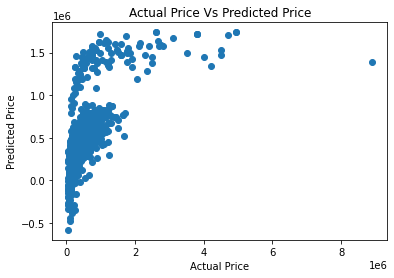

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Price')